italic--*
bold--**
bullet points - dash space, sub bullet with tab dash space
headers  single# followed by space for header
         ## followed by space for subheader
         
 links[link text]{http://url)
 horizontal lines - three astrisks

The labels on some of the columns are confusing so here is a breakdown of what the labels represent.

age:  How old the person is in years

sex: The person's gender (1 = male, 0 = female)

cp: The level of chest pain that the patient reported. 

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 indicates heart disease, 1 indicate no heart disease)

In [140]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier



Upload the heart disease database from Kaggle and assign it to df


In [141]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Look at the size of the data set.  It has 303 rows and 14 columns

In [3]:

df.shape


(303, 14)

Two different methods to check the data set for null values.  Both show no null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Note that the minimum age is 29 and the maximum age is 77.  The minimum cholesterol is 126 and the maximum is 564.  
Will want to check cholesterol for outliers.

In [6]:
#Look at information about the data.  

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Used two methods (df.corr and a heatmap) to look at the correlation in the data set between the columns and heart disease. The R correlation scores range from -1 to 1.  The values closer to -1 or 1 are more closely correlated than those closer to 0.  The closest correlations seem to be cp, thalach, and old peak.

In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


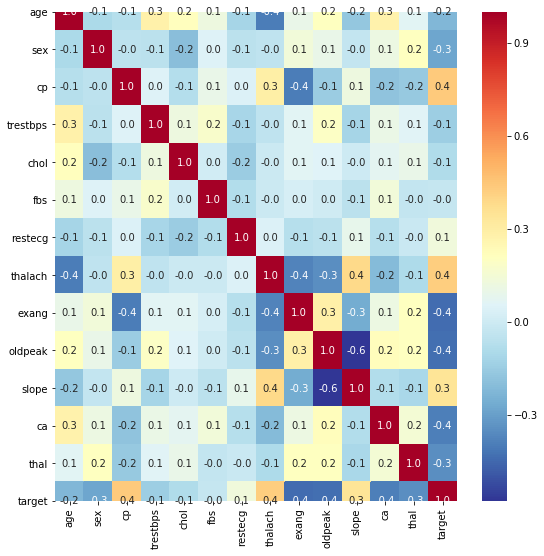

In [8]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,fmt='.1f',cmap=plt.cm.RdYlBu_r)
plt.show()

Check to see how many in the study have heart disease vs. don't have heart disease. 0 indicates heart disease, 1 indicates
no heart disease.

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Look at heart disease by gender.  0 indicates female and 1 indicates male.  Also, 0 indicates heart disease, 1 indicates no disease

In [10]:

df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

There are many more males in the study and females.  It would be nice if this were more balanced.

<BarContainer object of 2 artists>

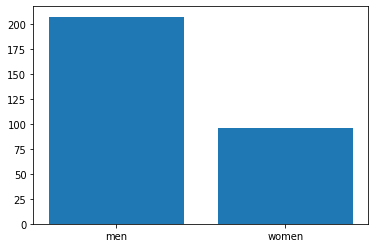

In [11]:
df['sex'].value_counts()
x = ['men','women']
y = [207,96]
plt.bar(x,y)

Graphically looking within each gender to see heart disease. It appears that a higher percentage of males 
have heart disease than females.

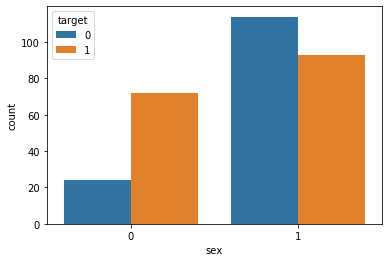

In [12]:
sns.countplot(x='sex',hue='target',data=df)

Look at the counts of each category of chest pain
Value 0: asymptomatic
Value 1: atypical angina
Value 2: pain without relation to angina
Value 3: typical angina
Most participants in the study indicated no chest pain, with the second highest report being pain without relation to angina

In [13]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Graphically look at whether chest pain has a correlation to heart disease.  Since the majority of 
individuals with heart disease reported no chest pain, chest pain doesn't seem to be an indicator.

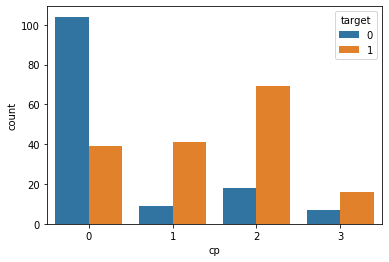

In [14]:
sns.countplot(x='cp',hue='target',data=df)

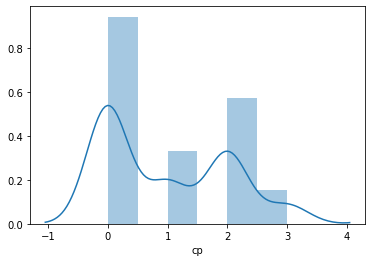

In [15]:
sns.distplot(df['cp'])
plt.show()

Graphically look at the range in the ages in the study.  The vertical line indicates the mean, so the majority of 
participants were in the 50-60 age group.  For another view, used a histogram to show the distribution of age.

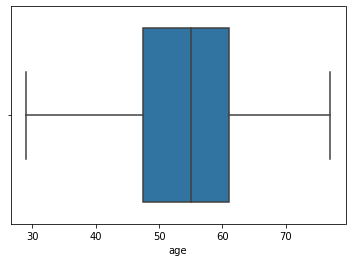

In [16]:
sns.boxplot(df['age'])
plt.show()

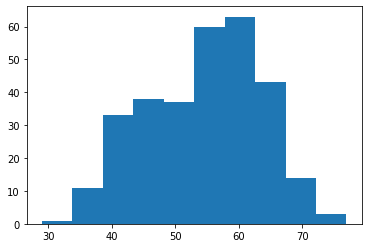

In [17]:
plt.hist(df['age'])
plt.show()

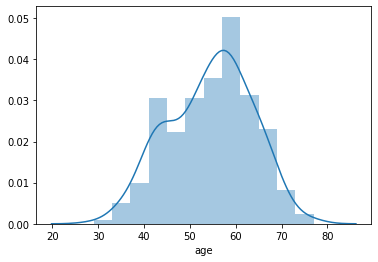

In [18]:
sns.distplot(df['age'])
plt.show()

This graph shows the distribution of ages with heart disease and no heart disease.  Age seems to be a factor in heart disease.

Text(0.5, 1.0, 'Distribution of Ages')

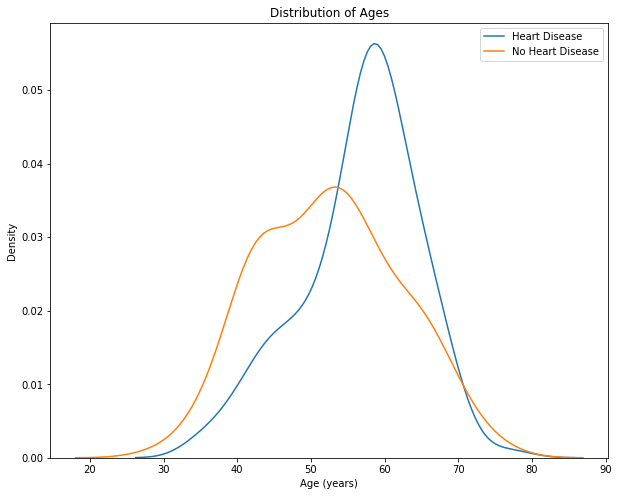

In [19]:
plt.figure(figsize = (10, 8))
sns.kdeplot(df.loc[df['target'] == 0, 'age'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'age'], label = 'No Heart Disease')
# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

Graphically look for outliers in resting blood pressure.  It appears there are some outliers to the right. Also used a histogram to look at the distribution of resting blood pressure

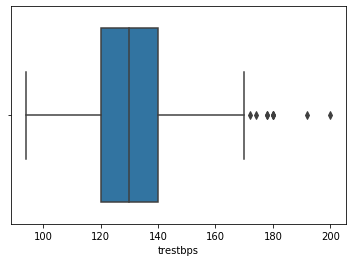

In [20]:
sns.boxplot(df['trestbps'])
plt.show()

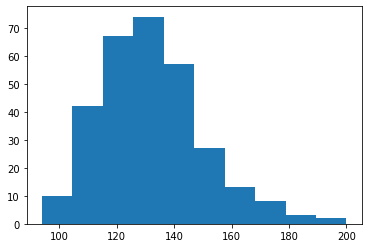

In [21]:
plt.hist(df['trestbps'])
plt.show()

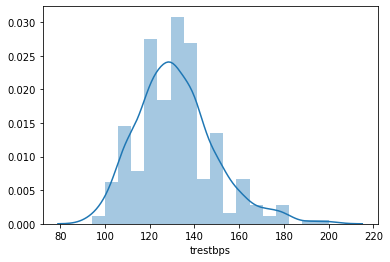

In [22]:
sns.distplot(df['trestbps'])
plt.show()

This looks at the resting blood pressure rate with and without heart disease.  Blood pressure of 120 over 80 is considered normal. Resting blood pressure does not seem to be a big indicator of heart disease.

Text(0.5, 1.0, 'Distribution of Resting Blood Pressure')

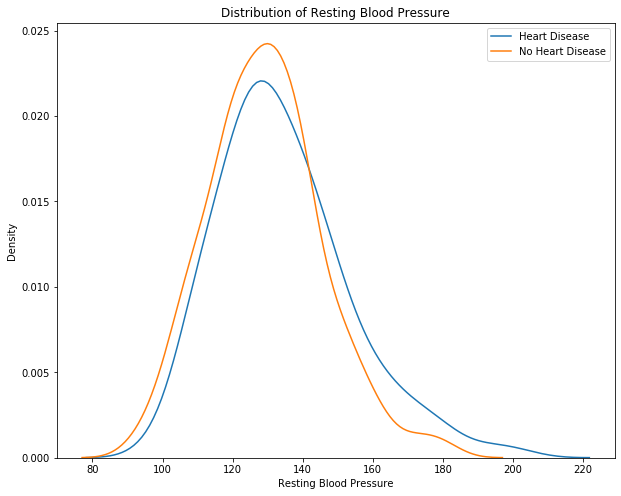

In [23]:
plt.figure(figsize = (10, 8))
sns.kdeplot(df.loc[df['target'] == 0, 'trestbps'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'trestbps'], label = 'No Heart Disease')
# Labeling of plot
plt.xlabel('Resting Blood Pressure'); plt.ylabel('Density'); plt.title('Distribution of Resting Blood Pressure')

Graphically look at the range in cholesterol.  The mean is around 250, but it appears there may be some outliers to the right.  Also used a histogram to look at the distribution of cholesterol.

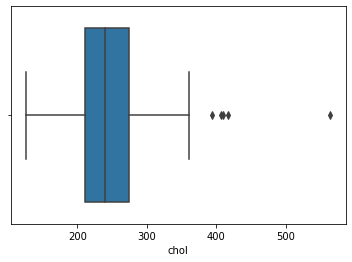

In [24]:
sns.boxplot(df['chol'])
plt.show()

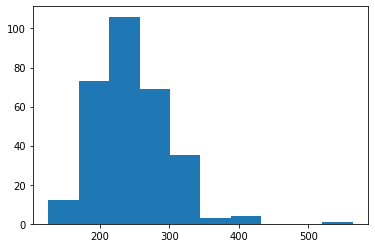

In [25]:
plt.hist(df['chol'])
plt.show()

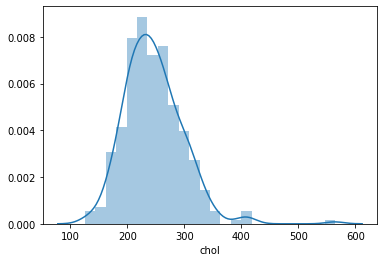

In [26]:
sns.distplot(df['chol'])
plt.show()

Total cholesterol less than 200 mg/dL is ideal for adults. Cholesterol between 200 and 239 mg/dL is considered borderline high. 240 mg/dL and above is considered high. The majority of participants in the study have high cholesterol.  It appears that cholesterol does have some impact on heart disease. One flaw of the study is that cholesterol is not divided into HDL (good) and LDL (bad).

Text(0.5, 1.0, 'Distribution of Cholesterol')

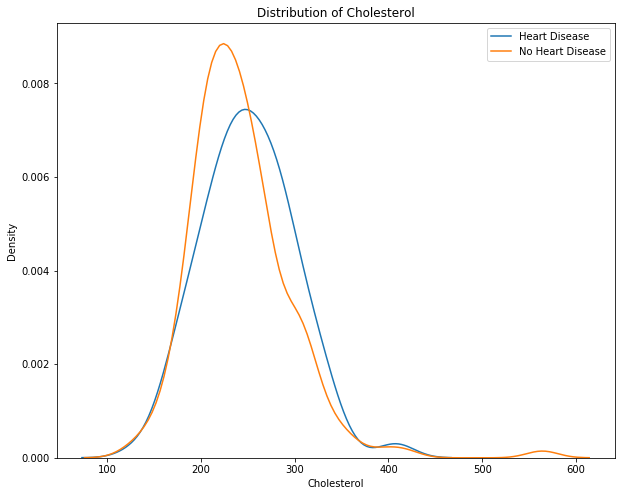

In [27]:
plt.figure(figsize = (10, 8))
sns.kdeplot(df.loc[df['target'] == 0, 'chol'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'chol'], label = 'No Heart Disease')
# Labeling of plot
plt.xlabel('Cholesterol'); plt.ylabel('Density'); plt.title('Distribution of Cholesterol')

There seems to be one outlier to the left but it is not signficant enough to need removed.

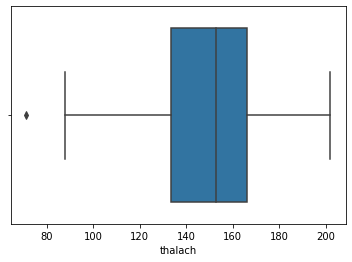

In [28]:
sns.boxplot(df['thalach'])
plt.show()

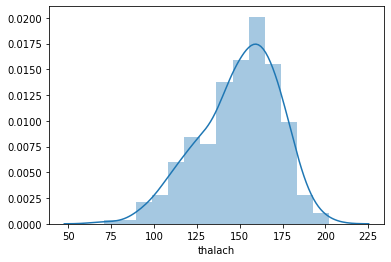

In [29]:
sns.distplot(df['thalach'])
plt.show()

In looking at the graph below, it appears that the maximum heart rate during a stress test does have an effect on heart disease.  This needs to be broken down further by age.  The ideal maximum heart rate is 220-age.

Text(0.5, 1.0, 'Distribution of Thalach')

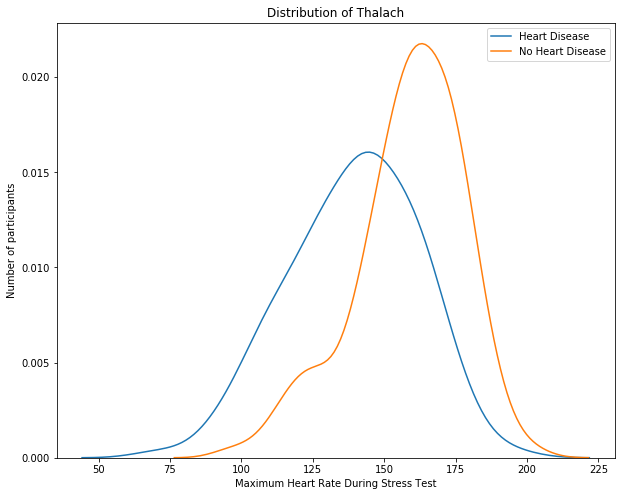

In [30]:
plt.figure(figsize = (10, 8))
sns.kdeplot(df.loc[df['target'] == 0, 'thalach'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'thalach'], label = 'No Heart Disease')
# Labeling of plot
plt.xlabel('Maximum Heart Rate During Stress Test'); plt.ylabel('Number of participants'); plt.title('Distribution of Thalach')

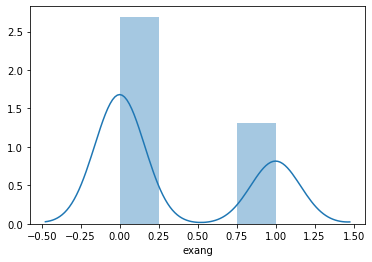

In [31]:
sns.distplot(df['exang'])
plt.show()

The graph indicates that angina during exercise is an indicator of heart disease

exang: Exercise induced angina (1 = yes; 0 = no)  This graph illustrates that people with Angia during exercise are more likely to have heart disease.

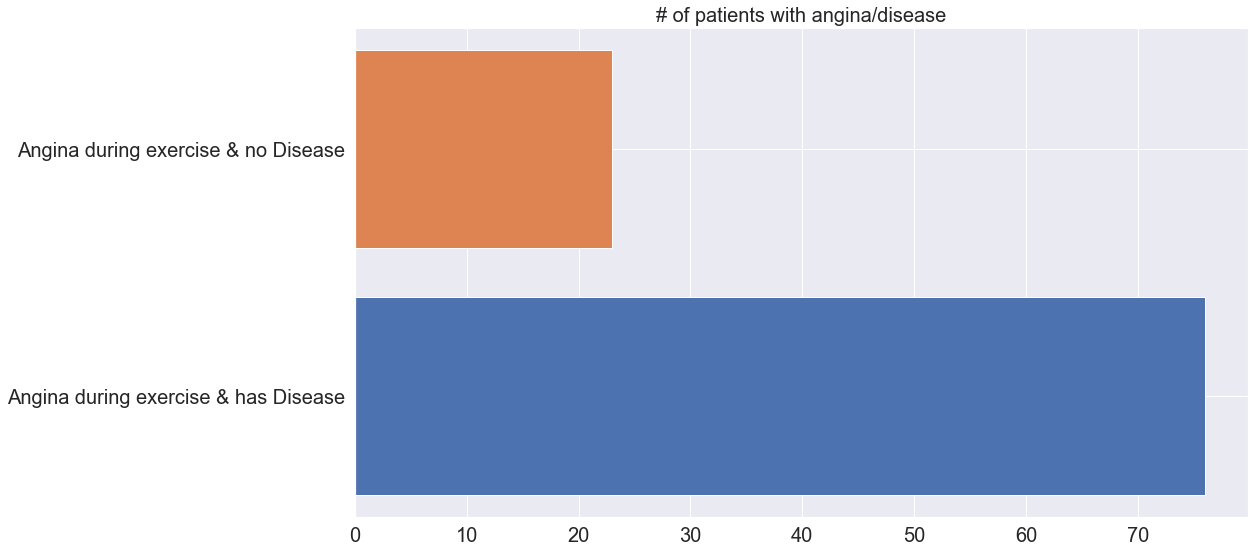

In [139]:
exang_disease = df[df['target']==0]['exang'].sum()
exang_no_disease = df[df['target']==1]['exang'].sum()

plt.figure(figsize=(16, 9))
plt.barh('Angina during exercise & has Disease',exang_disease)
plt.barh('Angina during exercise & no Disease',exang_no_disease)
plt.title('# of patients with angina/disease', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

There is a slope that indicates the ST segment during exercise my be an indicator of heart disease.

Text(0.5, 1.0, 'Distribution of ST Segment during exercise')

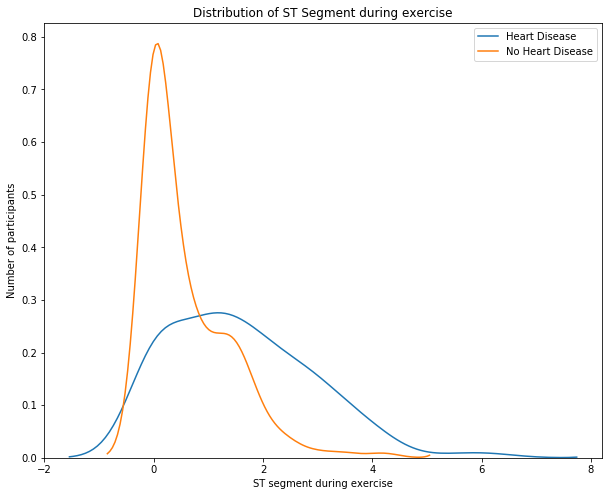

In [33]:
plt.figure(figsize = (10, 8))
sns.kdeplot(df.loc[df['target'] == 0, 'oldpeak'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'oldpeak'], label = 'No Heart Disease')
# Labeling of plot
plt.xlabel('ST segment during exercise'); plt.ylabel('Number of participants'); plt.title('Distribution of ST Segment during exercise')

The following graphs break down cp and exang by gender.  Males seem to have more chest pain and more exercise induced angina than females.

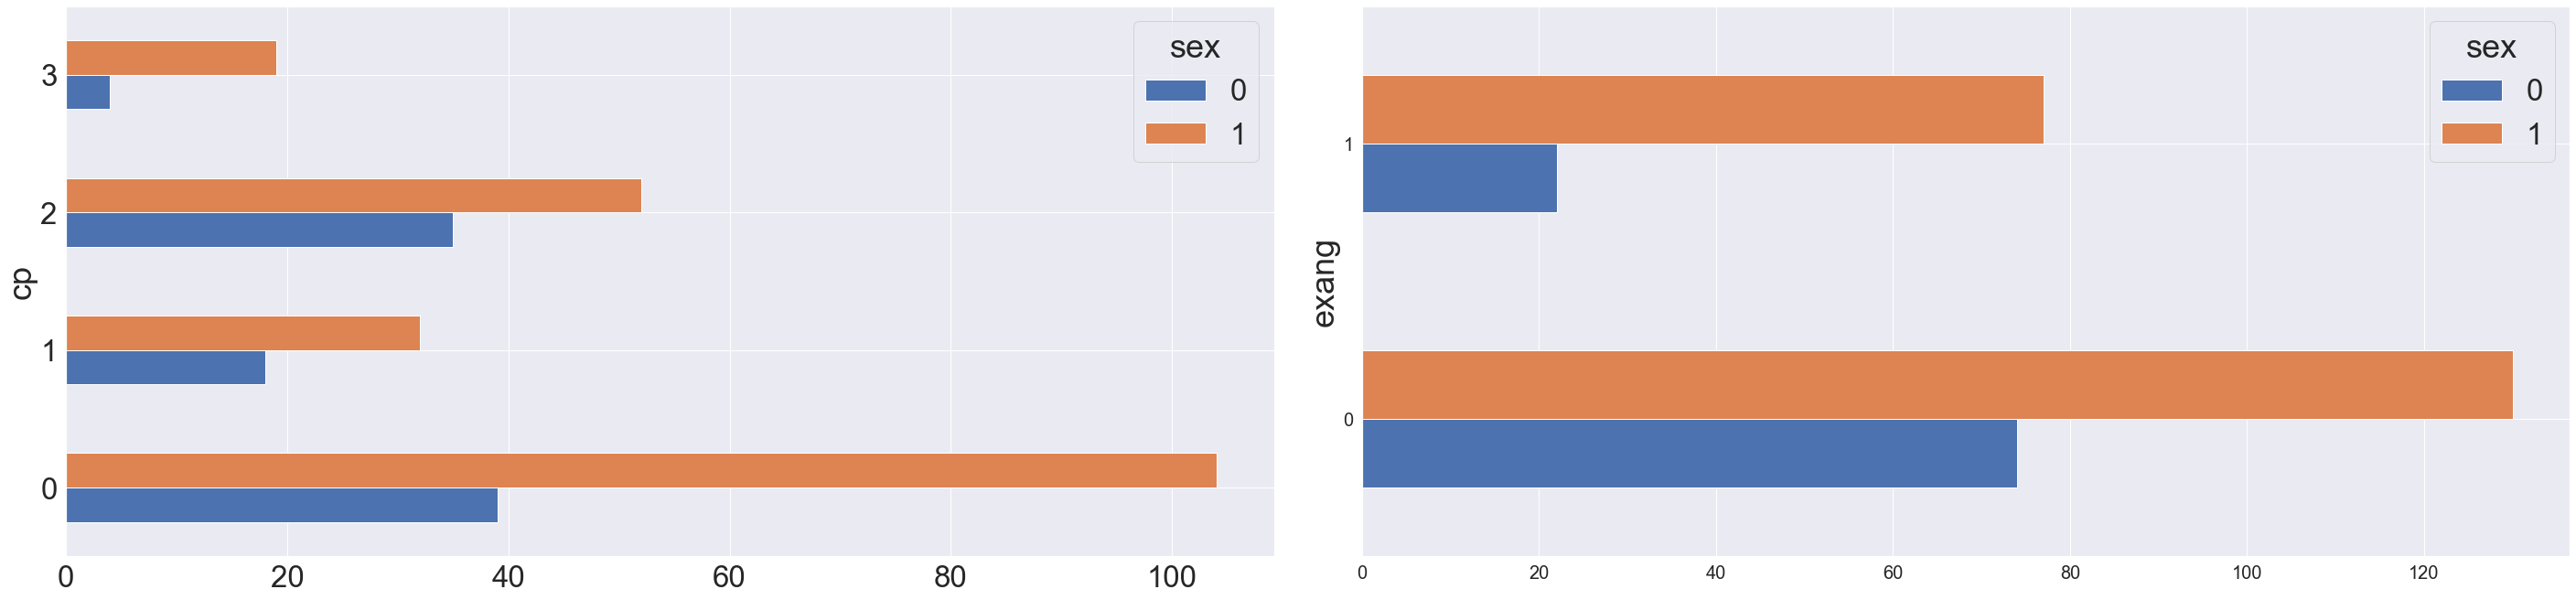

In [146]:
f, axes = plt.subplots(1, 2,figsize=(40,10))
sns.set(font_scale=3)
pd.crosstab(data.cp,data.sex).plot(kind='barh', ax=axes[0]);
pd.crosstab(data.exang,data.sex).plot(kind='barh', ax=axes[1]);
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

This is an overall representation of the data.  It plots every column against every other column.

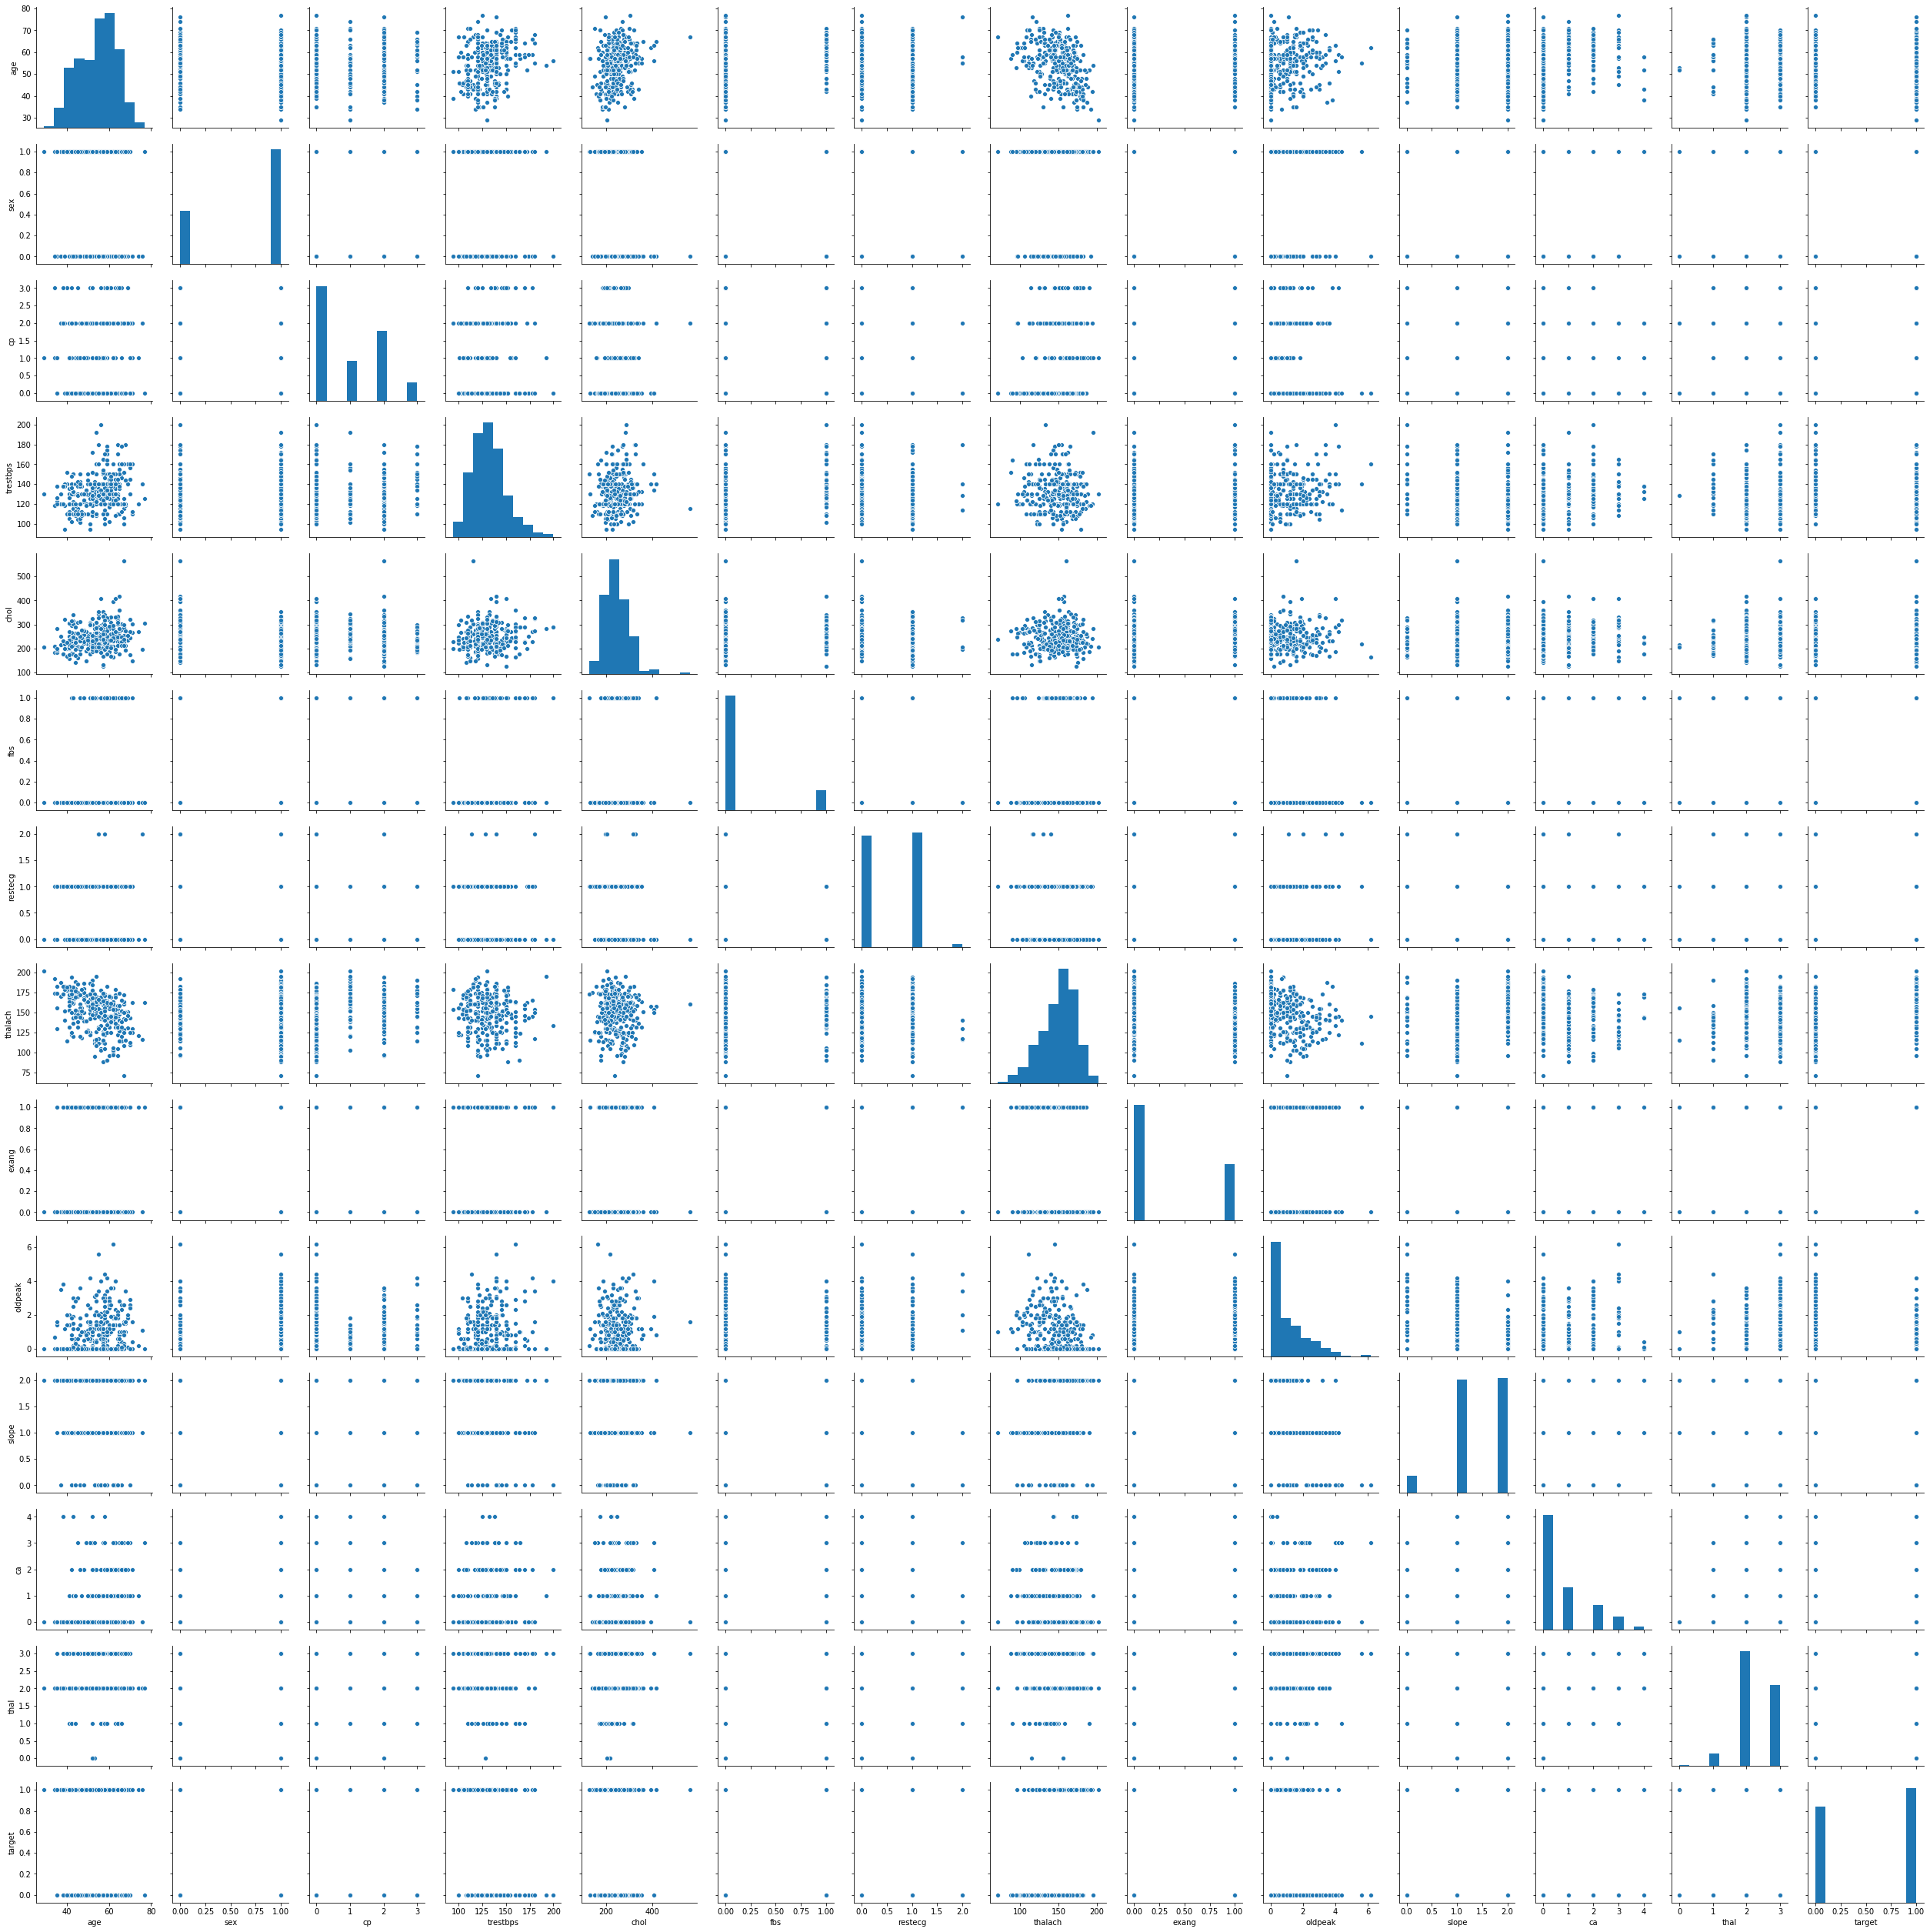

In [34]:
sns.pairplot(df)
plt.show()

This is a graphical representation of the age, sex, cp, chol, and resting blood pressure columns.

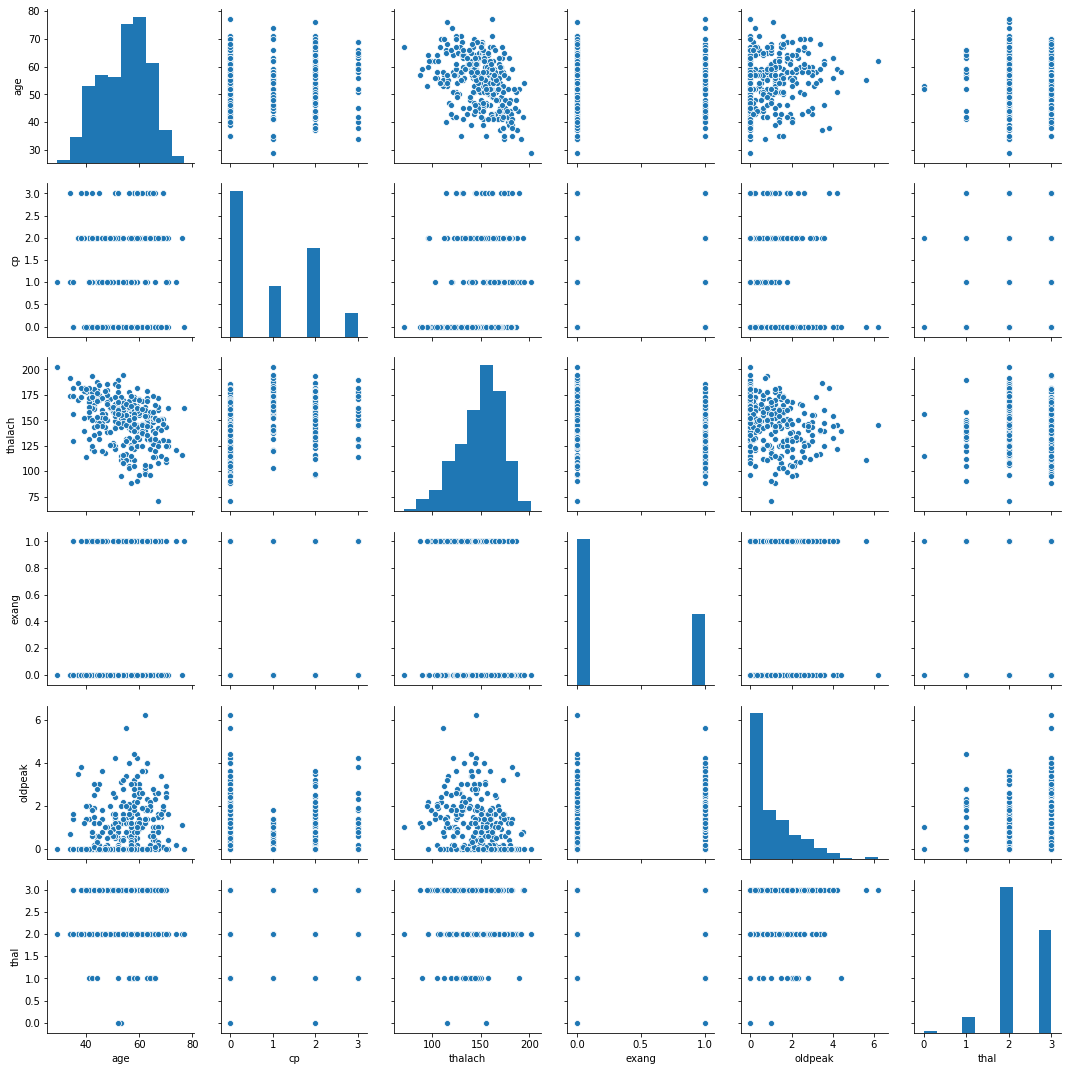

In [77]:
#plots subset of columns
sns.pairplot(df[['age','cp','thalach','exang','oldpeak','thal']])
plt.show()

In [81]:
X = df.drop(columns =['target'])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [82]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [38]:
r_state = 35

In [39]:
#X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=r_state) 

In [108]:
forest = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=4)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
X_train.shape

(203, 13)

In [41]:
X_test.shape

(100, 13)

In [42]:
my_model = LogisticRegression(random_state=r_state)
my_model.fit(X_train, y_train)

C:\Users\theoc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=35, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred = my_model.predict(X_test)

In [44]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [45]:
y_test.to_numpy()

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

This shows with no feature engineering. An accuracy of 80%

In [46]:
my_model.score(X_test,y_test)

0.82

In [47]:
#let's try fitting a subset of features
columns = ['age','sex','cp','thalach','exang','oldpeak','ca','thal']
subset = df[columns]
subset.head()

,age,sex,cp,thalach,exang,oldpeak,ca,thal
0,63,1,3,150,0,2.3,0,1
1,37,1,2,187,0,3.5,0,2
2,41,0,1,172,0,1.4,0,2
3,56,1,1,178,0,0.8,0,2
4,57,0,0,163,1,0.6,0,2


In [48]:
X=subset
y 
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [49]:
X_train.head()

,age,sex,cp,thalach,exang,oldpeak,ca,thal
37,54,1,2,165,0,1.6,0,3
16,58,0,2,172,0,0.0,0,2
126,47,1,0,143,0,0.1,0,2
291,58,1,0,140,0,4.4,3,1
273,58,1,0,156,0,0.1,1,3


Testing on the subset had a minimal effect on accuracy.  Went from 80% to 81% accuracy

In [50]:
#sub_model = LogisticRegression(random_state=r_state)
sub_model = LogisticRegression(random_state=42)
sub_model.fit(X_train,y_train)
y_grad = sub_model.predict(X_test)
sub_model.score(X_test,y_test)


C:\Users\theoc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.81

In [51]:
#let's try fitting a subset of features
columns = ['age','cp','thalach','exang','oldpeak','thal']
subset2 = df[columns]
subset2.head()

,age,cp,thalach,exang,oldpeak,thal
0,63,3,150,0,2.3,1
1,37,2,187,0,3.5,2
2,41,1,172,0,1.4,2
3,56,1,178,0,0.8,2
4,57,0,163,1,0.6,2


In [52]:
X=subset2
y 
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [53]:
X_train.head()

,age,cp,thalach,exang,oldpeak,thal
37,54,2,165,0,1.6,3
16,58,2,172,0,0.0,2
126,47,0,143,0,0.1,2
291,58,0,140,0,4.4,1
273,58,0,156,0,0.1,3


Went to 82% accuracy

In [54]:
#sub_model = LogisticRegression(random_state=r_state)
sub_model = LogisticRegression(random_state=42)
sub_model.fit(X_train,y_train)
y_grad = sub_model.predict(X_test)
sub_model.score(X_test,y_test)


C:\Users\theoc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.82

In [55]:
X=subset
y 
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [56]:
#let's try fitting a subset of features
columns = ['age','exang','oldpeak',]
subset3 = df[columns]
subset3.head()

,age,exang,oldpeak
0,63,0,2.3
1,37,0,3.5
2,41,0,1.4
3,56,0,0.8
4,57,1,0.6


In [57]:
X_train.head()

,age,sex,cp,thalach,exang,oldpeak,ca,thal
132,42,1,1,162,0,0.0,0,2
202,58,1,0,111,1,0.8,0,3
196,46,1,2,147,0,3.6,0,2
75,55,0,1,161,0,1.4,0,2
176,60,1,0,160,1,1.4,2,3


Trained on age, exang, and old peak.  Also changed the test size to .25.  Got an accuracy of 88%

In [58]:
#sub_model = LogisticRegression(random_state=r_state)
sub_model = LogisticRegression(random_state=42)
sub_model.fit(X_train,y_train)
y_grad = sub_model.predict(X_test)
sub_model.score(X_test,y_test)


C:\Users\theoc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8852459016393442

In [ ]:
Ran a Random Forest classifier 

In [59]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [60]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.819672131147541


Ran the Random Forest Classifier on just the age, exang, and oldpeak features.  Accuracy dropped to 72%

In [61]:
# Split dataset into features and labels
X=df[['age', 'exang','oldpeak']]  # Removed all features except
y=df['target']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=5) # 70% training and 30% test

In [62]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.691358024691358


One hot encoding converting sex,cp, slope, and thal columns so that they are dummy variables rather than categorial.

In [151]:
dataset=pd.get_dummies(df,columns=['sex','cp','slope','thal'])


In [152]:
dataset.head()


,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,145,233,1,0,150,0,2.3,0,1,...,0,0,1,1,0,0,0,1,0,0
1,37,130,250,0,1,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,0,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,120,236,0,1,178,0,0.8,0,1,...,1,0,0,0,0,1,0,0,1,0
4,57,120,354,0,1,163,1,0.6,0,1,...,0,0,0,0,0,1,0,0,1,0
